# Capstone 3 - Time Series Analysis

**asda** Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

## Importing Packages

In [1691]:
# Standard packages
import pandas as pd
import numpy as np
import calendar
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Facebook's Prophet forecasting library
from fbprophet import Prophet

# Standard plotly imports
from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# Statsmodels to test stationarity
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

## Dataset 1 - Wrangling and Cleaning

In [1692]:
# Reading CSV data from COLevelsByAtmosphere, GloballandTemperaturesByCountry
country_data = pd.read_csv(r"C:\Users\akama\OneDrive\Desktop\Data Science Bootcamp\IshMe\Capstone 3 - Time Series Analysis\raw_data\GlobalLandTemperaturesByCountry.csv")
CO_emissions = pd.read_excel(r"C:\Users\akama\OneDrive\Desktop\Data Science Bootcamp\IshMe\Capstone 3 - Time Series Analysis\raw_data\CO2Data_Emissions.xlsx")

In [1693]:
# Deriving data only pertaining to the US
US_data = country_data[country_data["Country"] == "United States"].copy()

# Convering "dt" column to datetime object
US_data["dt"] = pd.to_datetime(US_data["dt"])
US_data["Date"] = pd.to_datetime(US_data.dt, format="%Y")

# Subsetting to years without NaN values
US_data = US_data[(US_data["Date"].dt.year > 1820) & (US_data["Date"].dt.year < 2014)]
US_data = US_data.reset_index(drop=True)
US_data = US_data[["Date", "AverageTemperature", "AverageTemperatureUncertainty"]]

US_data

,Date,AverageTemperature,AverageTemperatureUncertainty
0,1821-01-01,-4.464,3.658
1,1821-02-01,-1.684,3.891
2,1821-03-01,1.953,2.700
3,1821-04-01,6.281,1.991
4,1821-05-01,13.429,2.212
...,...,...,...
2308,2013-05-01,14.073,0.178
2309,2013-06-01,20.198,0.236
2310,2013-07-01,22.074,0.152
2311,2013-08-01,21.168,0.249


## Dataset 1 - EDA

In [1694]:
# New DF subsetted from 1920 to 1951
df_anomaly = US_data[(US_data["Date"].dt.year > 1920) & (US_data["Date"].dt.year < 1951)]

# Subsetting for each month
jan = df_anomaly[df_anomaly["Date"].dt.month == 1]
feb = df_anomaly[df_anomaly["Date"].dt.month == 2]
mar = df_anomaly[df_anomaly["Date"].dt.month == 3]
apr = df_anomaly[df_anomaly["Date"].dt.month == 4]
may = df_anomaly[df_anomaly["Date"].dt.month == 5]
june  = df_anomaly[df_anomaly["Date"].dt.month == 6]
july = df_anomaly[df_anomaly["Date"].dt.month == 7]
aug = df_anomaly[df_anomaly["Date"].dt.month == 8]
sept = df_anomaly[df_anomaly["Date"].dt.month == 9]
october = df_anomaly[df_anomaly["Date"].dt.month == 10]
nov = df_anomaly[df_anomaly["Date"].dt.month == 11]
dec = df_anomaly[df_anomaly["Date"].dt.month == 12]

In [1695]:
# Empty column for average anomalies
US_data["AverageAnomaly"] = None
US_data.head()

,Date,AverageTemperature,AverageTemperatureUncertainty,AverageAnomaly
0,1821-01-01,-4.464,3.658,None
1,1821-02-01,-1.684,3.891,None
2,1821-03-01,1.953,2.700,None
3,1821-04-01,6.281,1.991,None
4,1821-05-01,13.429,2.212,None


In [1696]:
# List with each subsetted DF
months = [jan, feb, mar, apr, may, june, july, aug, sept, october, nov, dec]
monthly_means = []

# Calculate mean of each month and append to empty list
for month in months:
    avg_temp = month["AverageTemperature"].mean()
    monthly_means.append(avg_temp)

# print(monthly_means)

In [1697]:
# Subsetting full dataset for each month
jan = US_data[US_data["Date"].dt.month == 1]
feb = US_data[US_data["Date"].dt.month == 2]
mar = US_data[US_data["Date"].dt.month == 3]
apr = US_data[US_data["Date"].dt.month == 4]
may = US_data[US_data["Date"].dt.month == 5]
june  = US_data[US_data["Date"].dt.month == 6]
july = US_data[US_data["Date"].dt.month == 7]
aug = US_data[US_data["Date"].dt.month == 8]
sept = US_data[US_data["Date"].dt.month == 9]
october = US_data[US_data["Date"].dt.month == 10]
nov = US_data[US_data["Date"].dt.month == 11]
dec = US_data[US_data["Date"].dt.month == 12]

In [1698]:
# Creating series by calculating anomalies for each month 
s1 = (jan["AverageTemperature"]) - (monthly_means[0])
s2 = (feb["AverageTemperature"]) - (monthly_means[1])
s3 = (mar["AverageTemperature"]) - (monthly_means[2])
s4 = (apr["AverageTemperature"]) - (monthly_means[3])
s5 = (may["AverageTemperature"]) - (monthly_means[4])
s6 = (june["AverageTemperature"]) - (monthly_means[5])
s7 = (july["AverageTemperature"]) - (monthly_means[6])
s8 = (aug["AverageTemperature"]) - (monthly_means[7])
s9 = (sept["AverageTemperature"]) - (monthly_means[8])
s10 = (october["AverageTemperature"]) - (monthly_means[9])
s11 = (nov["AverageTemperature"]) - (monthly_means[10])
s12 = (dec["AverageTemperature"]) - (monthly_means[11])

In [1699]:
# Creating a DF from all series
df_temp = pd.concat([s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12], axis=1)

In [1700]:
# Combining columns for each month into one
df_temp.bfill(axis=1).iloc[:, 0]

0      -0.937333
1      -0.122133
2      -0.579467
3      -1.922933
4      -0.382433
          ...   
2308    0.261567
2309    1.451767
2310    0.596800
2311    0.664567
2312    1.917433
Name: AverageTemperature, Length: 2313, dtype: float64

In [1701]:
# Setting AverageAnomaly column to previous DF
US_data["AverageAnomaly"] = df_temp.bfill(axis=1).iloc[:, 0]

In [1702]:
# Setting Date column as index
US_data.set_index("Date", inplace=True)

In [1703]:
US_data

,AverageTemperature,AverageTemperatureUncertainty,AverageAnomaly
Date,,,
1821-01-01,-4.464,3.658,-0.937333
1821-02-01,-1.684,3.891,-0.122133
1821-03-01,1.953,2.700,-0.579467
1821-04-01,6.281,1.991,-1.922933
1821-05-01,13.429,2.212,-0.382433
...,...,...,...
2013-05-01,14.073,0.178,0.261567
2013-06-01,20.198,0.236,1.451767
2013-07-01,22.074,0.152,0.596800


In [1704]:
# Creating DF from subsetted copy of full dataset
df_temp = US_data.copy()
df_temp.drop(columns=["AverageTemperature", "AverageTemperatureUncertainty"], inplace=True)

In [1705]:
df_temp

,AverageAnomaly
Date,
1821-01-01,-0.937333
1821-02-01,-0.122133
1821-03-01,-0.579467
1821-04-01,-1.922933
1821-05-01,-0.382433
...,...
2013-05-01,0.261567
2013-06-01,1.451767
2013-07-01,0.596800


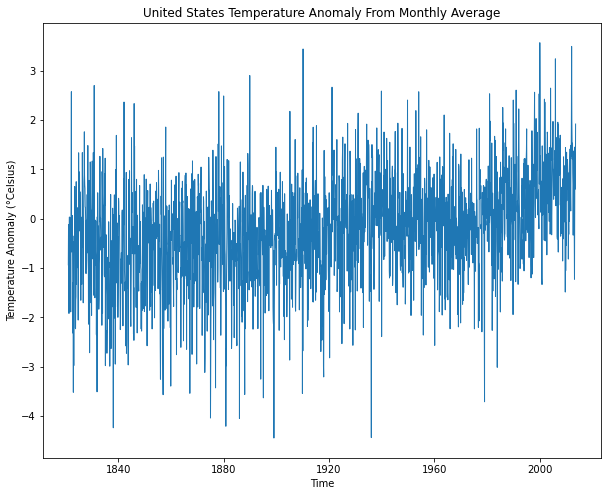

In [1706]:
# Plotting average temperature anomalies
plt.figure(figsize=(10, 8))
plt.xlabel("Time")
plt.ylabel("Temperature Anomaly (°Celsius)")
plt.title("United States Temperature Anomaly From Monthly Average")
plt.plot(df_temp, linewidth=1.0)

In [1707]:
# Resample dataset from yearly means
df_temp.resample("A").mean().head()

,AverageAnomaly
Date,
1821-12-31,-0.933758
1822-12-31,-0.551008
1823-12-31,-1.026842
1824-12-31,-0.435592
1825-12-31,0.028658


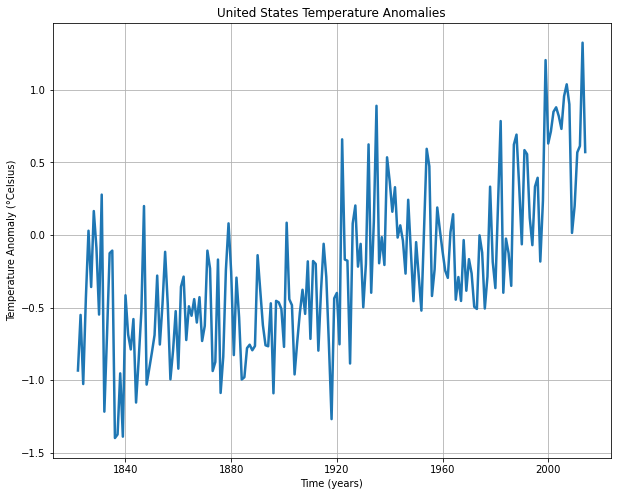

In [1708]:
# Create new DF from resampled dataset
df_temp_resampled = df_temp.resample('A').mean()

# Plot temperature anomalies from resampled dataset
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(df_temp_resampled, linewidth=2.5)
ax.set(xlabel="Time (years)", ylabel="Temperature Anomaly (°Celsius)", title="United States Temperature Anomalies")

ax.grid()

In [1709]:
# Interactive plot using Plotly
df_temp_resampled.iplot(kind="line", xTitle="Time (years)", yTitle="Temperature Anomaly (°Celsius)", title="United States Temperature Anomalies")

In [1710]:
# Save new dataset as US_data.csv
US_data.to_csv(r"C:\Users\akama\OneDrive\Desktop\Data Science Bootcamp\IshMe\Capstone 3 - Time Series Analysis\raw_data\US_data.csv", index= False)

## Dataset 2 - Wrangling and Cleaning

In [1711]:
# Filtering dataset for United States only, from 1900 onwards
CO_emissions = CO_emissions[(CO_emissions["country"] == "United States") & ((CO_emissions["year"] > 1899))]
CO_emissions = CO_emissions.reset_index()
CO_emissions.drop(columns="index", inplace=True)

In [1712]:
CO_emissions.head()

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,USA,United States,1900,664.123,NaN,6.17,38.590,NaN,8.432,NaN,...,NaN,NaN,NaN,NaN,NaN,78763706.0,6.139981e+11,NaN,NaN,NaN
1,USA,United States,1901,723.182,NaN,8.89,59.059,NaN,9.002,NaN,...,NaN,NaN,NaN,NaN,NaN,80336086.0,6.831060e+11,NaN,NaN,NaN
2,USA,United States,1902,766.638,NaN,6.01,43.456,NaN,9.355,NaN,...,NaN,NaN,NaN,NaN,NaN,81949920.0,6.901269e+11,NaN,NaN,NaN
3,USA,United States,1903,896.937,NaN,17.00,130.299,NaN,10.728,NaN,...,NaN,NaN,NaN,NaN,NaN,83606240.0,7.237664e+11,NaN,NaN,NaN
4,USA,United States,1904,882.953,NaN,-1.56,-13.984,NaN,10.352,NaN,...,NaN,NaN,NaN,NaN,NaN,85296008.0,7.146219e+11,NaN,NaN,NaN


In [1713]:
# Checking percent of missing values per column and creating DF
percent_missing = CO_emissions.isna().sum() * 100 / len(CO_emissions)
missing_df = pd.DataFrame({"percent_missing": percent_missing})

# Showing columns with missing values only
missing_df[missing_df["percent_missing"] != 0]

,percent_missing
consumption_co2,75.833333
trade_co2,75.833333
consumption_co2_per_capita,75.833333
co2_per_gdp,0.833333
consumption_co2_per_gdp,75.833333
co2_per_unit_energy,54.166667
flaring_co2,41.666667
other_industry_co2,75.000000
flaring_co2_per_capita,41.666667
other_co2_per_capita,75.000000


In [1714]:
# Copying columns with less than 50% NaN values 
add_columns = CO_emissions[["co2_per_gdp", "co2_per_unit_energy", "flaring_co2", 
                            "flaring_co2_per_capita", "share_global_flaring_co2", "gdp"]]

# Dropping and rejoining DFs
CO_emissionsDropNA = CO_emissions.dropna(axis=1)
CO_emissionsDropNA = CO_emissionsDropNA.join(add_columns)
CO_emissions = CO_emissionsDropNA

In [1715]:
CO_emissions.head()

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,...,share_global_cumulative_coal_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,population,co2_per_gdp,co2_per_unit_energy,flaring_co2,flaring_co2_per_capita,share_global_flaring_co2,gdp
0,USA,United States,1900,664.123,6.17,38.590,8.432,33.99,10665.824,23.80,...,23.10,100.00,47.06,78763706.0,1.082,NaN,NaN,NaN,NaN,6.139981e+11
1,USA,United States,1901,723.182,8.89,59.059,9.002,35.83,11389.006,24.31,...,23.61,100.00,46.15,80336086.0,1.059,NaN,NaN,NaN,NaN,6.831060e+11
2,USA,United States,1902,766.638,6.01,43.456,9.355,37.04,12155.645,24.85,...,24.14,100.00,45.90,81949920.0,1.111,NaN,NaN,NaN,NaN,6.901269e+11
3,USA,United States,1903,896.937,17.00,130.299,10.728,39.71,13052.582,25.51,...,24.78,100.00,45.94,83606240.0,1.239,NaN,NaN,NaN,NaN,7.237664e+11
4,USA,United States,1904,882.953,-1.56,-13.984,10.352,38.68,13935.534,26.07,...,25.32,99.99,46.16,85296008.0,1.236,NaN,NaN,NaN,NaN,7.146219e+11


In [1716]:
# Checking percent of missing values per column and creating DF
percent_missing = CO_emissions.isna().sum() * 100 / len(CO_emissions)
missing_df = pd.DataFrame({"percent_missing": percent_missing})

# Showing columns with missing values only
missing_df[missing_df["percent_missing"] != 0]

,percent_missing
co2_per_gdp,0.833333
co2_per_unit_energy,54.166667
flaring_co2,41.666667
flaring_co2_per_capita,41.666667
share_global_flaring_co2,41.666667
gdp,0.833333


In [1717]:
CO_emissions.columns

Index(['iso_code', 'country', 'year', 'co2', 'co2_growth_prct',
       'co2_growth_abs', 'co2_per_capita', 'share_global_co2',
       'cumulative_co2', 'share_global_cumulative_co2', 'coal_co2',
       'cement_co2', 'gas_co2', 'oil_co2', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'share_global_cement_co2', 'share_global_coal_co2',
       'share_global_gas_co2', 'share_global_oil_co2', 'cumulative_cement_co2',
       'cumulative_coal_co2', 'cumulative_gas_co2', 'cumulative_oil_co2',
       'share_global_cumulative_cement_co2',
       'share_global_cumulative_coal_co2', 'share_global_cumulative_gas_co2',
       'share_global_cumulative_oil_co2', 'population', 'co2_per_gdp',
       'co2_per_unit_energy', 'flaring_co2', 'flaring_co2_per_capita',
       'share_global_flaring_co2', 'gdp'],
      dtype='object')

In [1718]:
# Dropping unnecessary columns
columns = ["iso_code", "cumulative_co2", "cumulative_cement_co2", "cumulative_coal_co2", "cumulative_gas_co2", 
           "cumulative_oil_co2", "share_global_cumulative_co2", "share_global_cumulative_cement_co2", 
           "share_global_cumulative_coal_co2", "share_global_cumulative_gas_co2", "share_global_cumulative_oil_co2"]

In [1719]:
CO_emissions.drop(columns=columns, inplace=True)

In [1720]:
print(CO_emissions.shape)

(120, 26)


In [1721]:
# Subsetting for columns with most missing values
NaN_values_DF = CO_emissions[["year", "co2_per_unit_energy", "flaring_co2", "flaring_co2_per_capita", "share_global_flaring_co2"]]

# Checking DF for rows with NaN values
NaN_values_DF[NaN_values_DF.isna().any(axis=1)]

,year,co2_per_unit_energy,flaring_co2,flaring_co2_per_capita,share_global_flaring_co2
0,1900,NaN,NaN,NaN,NaN
1,1901,NaN,NaN,NaN,NaN
2,1902,NaN,NaN,NaN,NaN
3,1903,NaN,NaN,NaN,NaN
4,1904,NaN,NaN,NaN,NaN
...,...,...,...,...,...
60,1960,NaN,30.316,0.162,34.01
61,1961,NaN,28.198,0.149,32.71
62,1962,NaN,22.922,0.119,26.67
63,1963,NaN,20.650,0.106,22.82


In [1722]:
# Dropping co2_per_unit_energy and share_global_flaring_co2
NaN_values_DF.drop(columns=["co2_per_unit_energy", "share_global_flaring_co2"], inplace=True)

In [1723]:
# Filtering for rows where entries are not null
NaN_values_DF[~NaN_values_DF.isna().any(axis=1)]

,year,flaring_co2,flaring_co2_per_capita
50,1950,43.122,0.272
51,1951,42.700,0.265
52,1952,45.683,0.280
53,1953,43.620,0.263
54,1954,38.952,0.231
...,...,...,...
115,2015,61.985,0.193
116,2016,52.850,0.164
117,2017,54.844,0.169
118,2018,71.793,0.220


In [1724]:
# Create series from flaring_co2_per_capita values for 50 years
ts = pd.Series(NaN_values_DF["flaring_co2_per_capita"].iloc[50:101].values)

# Reverse the values of column, keeping index the same
ts = pd.Series(ts.values[::-1], ts.index)
ts.head()

0    0.129
1    0.129
2    0.131
3    0.141
4    0.142
dtype: float64

In [1725]:
# Setting the first 50 rows of DF to above series
CO_emissions["flaring_co2_per_capita"].iloc[:51] = ts

In [1726]:
# Dropping columns deemed unnecessary from full dataset
CO_emissions.drop(columns=["co2_per_unit_energy", "flaring_co2", "share_global_flaring_co2"], inplace=True)

In [1727]:
# Checking if last 2 columns still have null values
CO_emissions[CO_emissions["co2_per_gdp"].isna()]

,country,year,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,share_global_co2,coal_co2,cement_co2,gas_co2,...,gas_co2_per_capita,oil_co2_per_capita,share_global_cement_co2,share_global_coal_co2,share_global_gas_co2,share_global_oil_co2,population,co2_per_gdp,flaring_co2_per_capita,gdp
119,United States,2019,5284.697,-2.58,-140.185,16.06,14.5,1094.657,41.251,1706.873,...,5.187,7.119,2.64,7.62,22.41,18.96,329064917.0,NaN,0.218,NaN


In [1728]:
# Forward filling last missing value
CO_emissions.fillna(method="ffill", inplace=True)

In [1729]:
# Dropping country name column
CO_emissions.drop(columns='country', inplace=True)

In [1730]:
CO_emissions.columns

Index(['year', 'co2', 'co2_growth_prct', 'co2_growth_abs', 'co2_per_capita',
       'share_global_co2', 'coal_co2', 'cement_co2', 'gas_co2', 'oil_co2',
       'cement_co2_per_capita', 'coal_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita', 'share_global_cement_co2',
       'share_global_coal_co2', 'share_global_gas_co2', 'share_global_oil_co2',
       'population', 'co2_per_gdp', 'flaring_co2_per_capita', 'gdp'],
      dtype='object')

In [1731]:
# Reordering columns of DF
column_order = ["year", "co2", "co2_growth_abs", "share_global_co2", 
                "coal_co2", "cement_co2", "gas_co2", "oil_co2", 
                "co2_per_capita", "coal_co2_per_capita", "cement_co2_per_capita", 
                "gas_co2_per_capita", "oil_co2_per_capita", "flaring_co2_per_capita", 
                "share_global_coal_co2", "share_global_cement_co2", "share_global_gas_co2",
                "share_global_oil_co2", "population", "gdp"]

CO_emissions = CO_emissions[column_order]

# Setting year column to datetime value and as index
CO_emissions['year'] = pd.to_datetime(CO_emissions.year, format='%Y')
CO_emissions.set_index('year', inplace=True)

In [1732]:
# Checking final dataset
print(CO_emissions.columns)
CO_emissions.head()

Index(['co2', 'co2_growth_abs', 'share_global_co2', 'coal_co2', 'cement_co2',
       'gas_co2', 'oil_co2', 'co2_per_capita', 'coal_co2_per_capita',
       'cement_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'flaring_co2_per_capita', 'share_global_coal_co2',
       'share_global_cement_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'population', 'gdp'],
      dtype='object')

## Dataset 2 - EDA

Text(0, 0.5, 'Carbon Emissions Per Capita (Tons Per Person)')

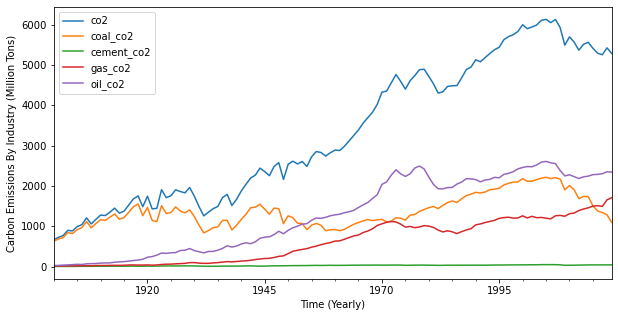

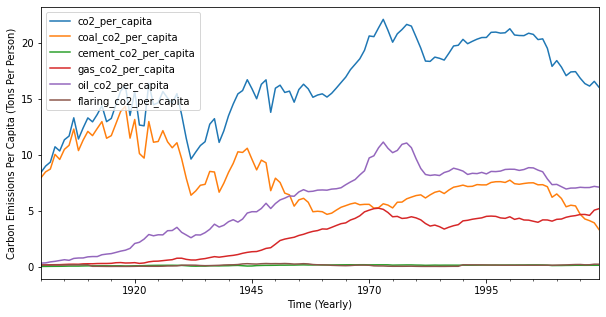

In [1733]:
# Plotting CO2 emissions by industry in million tons and per capita
df_emissions = pd.DataFrame(CO_emissions, columns=["co2", "coal_co2", "cement_co2", "gas_co2", "oil_co2"])
df_per_capita = pd.DataFrame(CO_emissions, columns=["co2_per_capita", "coal_co2_per_capita", "cement_co2_per_capita", 
                                                    "gas_co2_per_capita", "oil_co2_per_capita", "flaring_co2_per_capita"])

# PLotting both DFs
df_emissions.plot(figsize=(10, 5))
plt.xlabel("Time (Yearly)")
plt.ylabel("Carbon Emissions By Industry (Million Tons)")

df_per_capita.plot(figsize=(10, 5))
plt.xlabel("Time (Yearly)")
plt.ylabel("Carbon Emissions Per Capita (Tons Per Person)")

In [1734]:
# Interactive plot using Plotly
df_per_capita.drop(columns=["co2_per_capita"]).iplot(kind='line', xTitle='Time (years)', 
                                                     yTitle='Emissions (Metric Tons per Capita)', 
                                                     title='Global CO2 Emissions over Time')

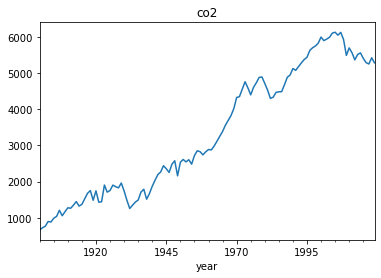

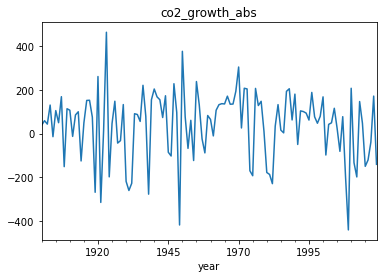

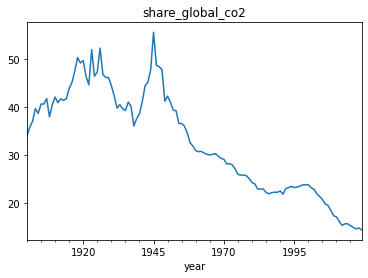

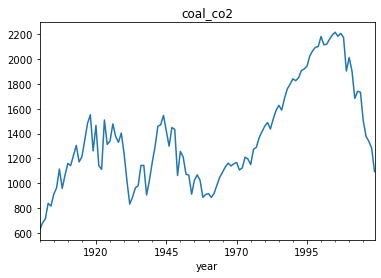

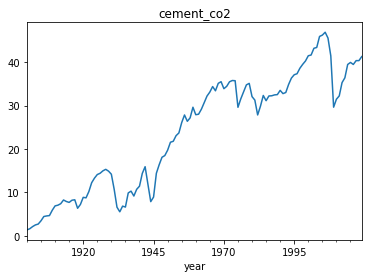

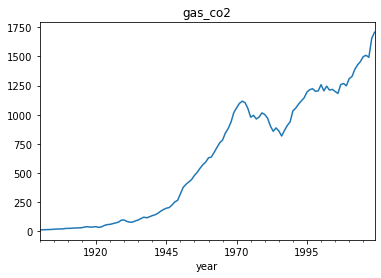

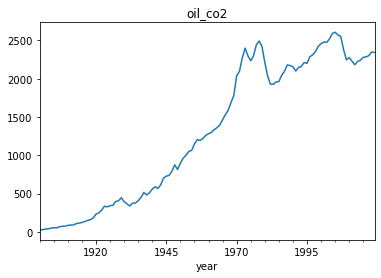

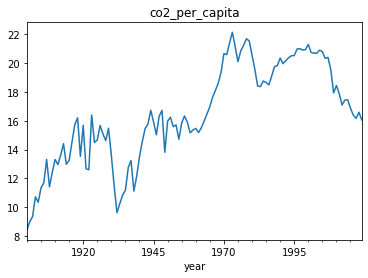

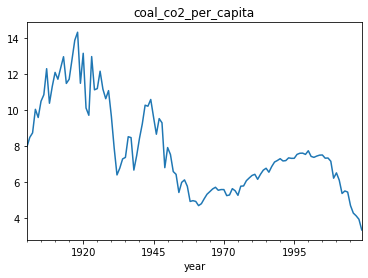

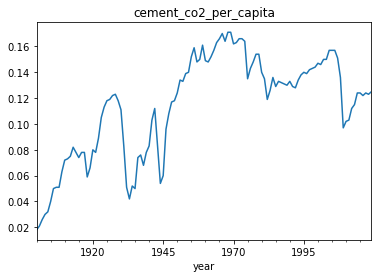

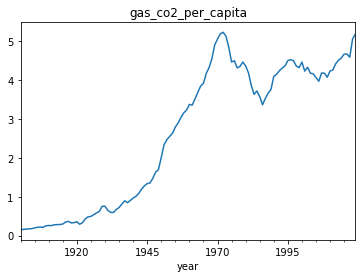

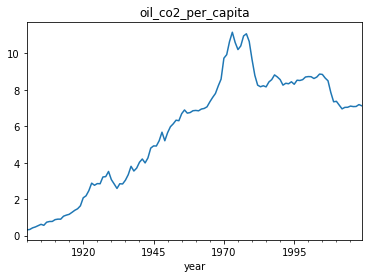

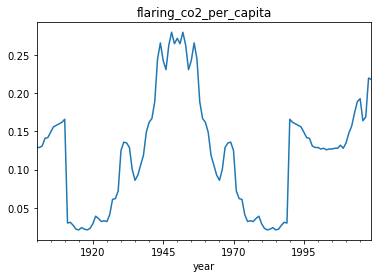

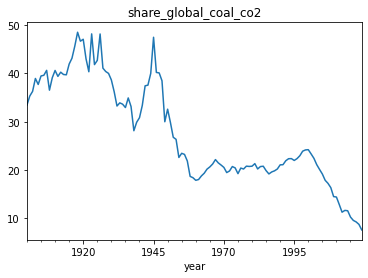

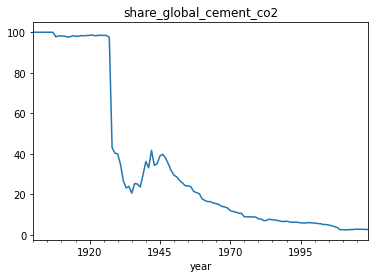

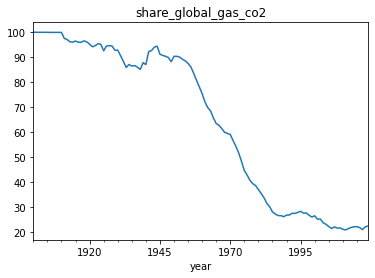

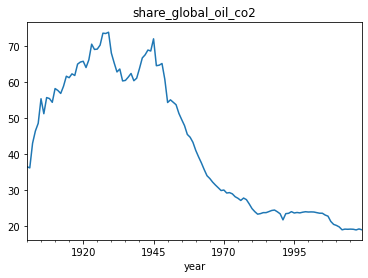

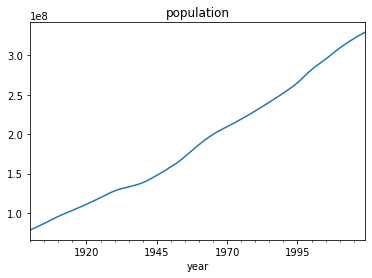

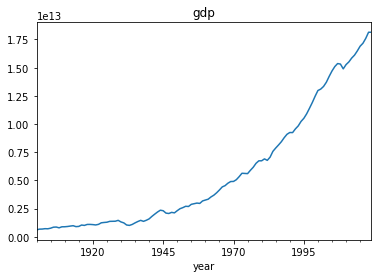

In [1735]:
df_plot = CO_emissions
df_plot

for i, col in enumerate(df_plot.columns):
    df_plot[col].plot(fig=plt.figure(i))
    plt.title(col)
    
plt.show()

<AxesSubplot:>

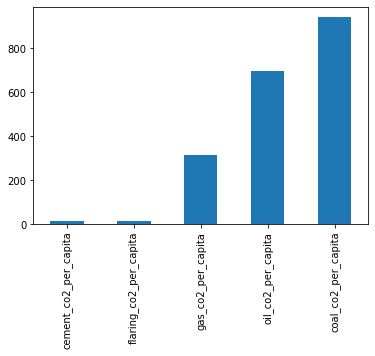

In [1736]:
# Dropping total co2 emissions per capita and plotting industries on bar chart
co2_by_industry = df_per_capita.drop(columns=["co2_per_capita"]).sum().sort_values()
fig = plt.figure()
x_label = df_per_capita.columns
x_tick = np.arange(len(cols))
co2_by_industry.plot(kind="bar")

In [1737]:
print(CO_emissions.shape)
CO_emissions.tail()

(120, 19)


,co2,co2_growth_abs,share_global_co2,coal_co2,cement_co2,gas_co2,oil_co2,co2_per_capita,coal_co2_per_capita,cement_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,flaring_co2_per_capita,share_global_coal_co2,share_global_cement_co2,share_global_gas_co2,share_global_oil_co2,population,gdp
year,,,,,,,,,,,,,,,,,,,
2015-01-01,5412.432,-149.287,15.37,1503.253,39.907,1497.933,2278.794,16.868,4.685,0.124,4.668,7.102,0.193,10.28,2.79,22.15,19.13,320878312.0,1.690258e+13
2016-01-01,5292.268,-120.165,15.03,1378.160,39.439,1509.030,2285.330,16.384,4.266,0.122,4.672,7.075,0.164,9.59,2.69,21.74,19.09,323015992.0,1.716256e+13
2017-01-01,5253.606,-38.661,14.72,1337.536,40.324,1491.792,2301.967,16.161,4.114,0.124,4.589,7.081,0.169,9.28,2.73,20.97,18.91,325084758.0,1.759628e+13
2018-01-01,5424.882,171.275,14.90,1282.052,40.324,1653.038,2350.087,16.585,3.920,0.123,5.054,7.185,0.220,8.77,2.66,22.07,19.18,327096263.0,1.814065e+13
2019-01-01,5284.697,-140.185,14.50,1094.657,41.251,1706.873,2342.536,16.060,3.327,0.125,5.187,7.119,0.218,7.62,2.64,22.41,18.96,329064917.0,1.814065e+13


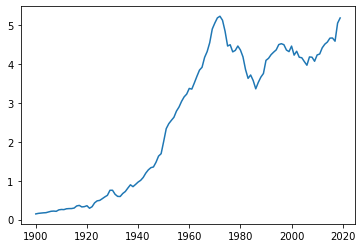

In [1738]:
# Creating series and plot
mte = CO_emissions["gas_co2_per_capita"]
plt.plot(mte)

In [1739]:
# Function to plot the moving average
def TestStationaryPlot(ts):
    # Calculating rolling mean and std
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    # Plotting data and rolling mean/std
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks()
    plt.yticks()
    
    # Labeling plot
    plt.xlabel('Time in Years')
    plt.ylabel('Total Emissions')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block= True)

In [1740]:
# Function to perform the Dickey-Fuller Test
def TestStationaryAdfuller(ts, cutoff = 0.01):
    # Call adfuller function, create output series from first 4 values
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    # Printing critical values at 1%/5%/10% CI
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    # If p-value is less than or equal to cutoff value (1%), stationary
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    # Otherwise dataset is non-stationary
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

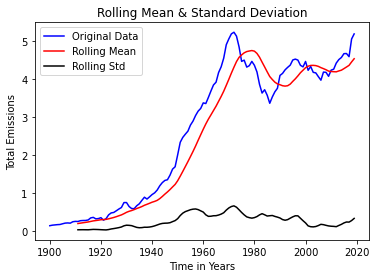

In [1741]:
# Plotting stationarity
TestStationaryPlot(mte)

In [1742]:
# Performing Dickey-Fuller Test
TestStationaryAdfuller(mte)

Test Statistic                  -0.612812
p-value                          0.868061
#Lags Used                       4.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


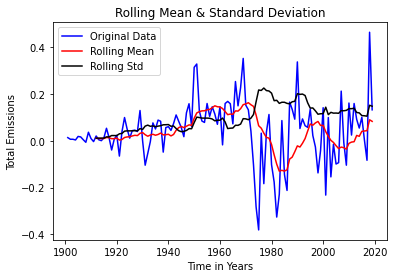

In [1743]:
# Taking first difference of data and plotting
mte_first_difference = mte - mte.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

In [1744]:
# Dickey-Fuller Test for stationarity
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test Statistic                  -3.865274
p-value                          0.002306
#Lags Used                       3.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [1745]:
CO_emissions.to_csv(r"C:\Users\akama\OneDrive\Desktop\Data Science Bootcamp\IshMe\Capstone 3 - Time Series Analysis\raw_data\CO_emissions.csv", index= False)